In [1]:
import datetime as dtm
import numpy as np
import statsmodels.formula.api as smd
import pandas as pd
import pandas_datareader.data as pdr
from pandas import DataFrame
import yfinance
import seaborn as sns
import matplotlib.pyplot as plt

## Download fama french 5 factors and 6 stocks, save these to csv

In [2]:
tickers = ['AAPL', 'BABA', 'IBM', 'MSFT', 'GOOGL', 'GME']
end = dtm.date(2020, 12, 1)
start = dtm.date(2019, 11, 29)
ff_factors = pdr.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench', start, end)[0]
yfinance.pdr_override()
all_data = {}
for ticker in tickers:
    all_data[ticker] = pdr.get_data_yahoo(ticker, start, end)
price = DataFrame({tic: all_data[tic]['Adj Close'] for tic in all_data})
price.to_csv('../data/all_data.csv')
ff_factors.to_csv('../data/ff_factors.csv')

## Read the stock data and calculate the difference

In [3]:
price = pd.read_csv('../../data/all_data.csv')
price.index = [dtm.datetime.strptime(str(x), "%Y-%m-%d") for x in price.iloc[:, 0]]
price = price.iloc[:, 1:]
log_prices = []
for ticker in tickers:
    log_prices.append(np.log(price[ticker]).diff().dropna())
df = pd.concat(log_prices, axis=1).dropna()
df.columns = tickers

## Read Fama French 5 factors.SMD was used to do the regression of 6 stocks with OLS

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     238.6
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           3.47e-92
Time:                        12:53:20   Log-Likelihood:                 756.26
No. Observations:                 252   AIC:                            -1501.
Df Residuals:                     246   BIC:                            -1479.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.001      0.792      0.4

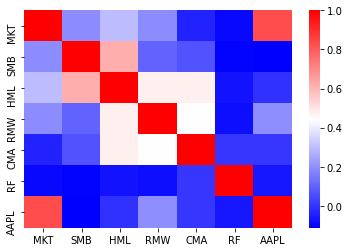

                            OLS Regression Results                            
Dep. Variable:                   BABA   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     30.88
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           2.43e-24
Time:                        12:53:20   Log-Likelihood:                 642.06
No. Observations:                 252   AIC:                            -1272.
Df Residuals:                     246   BIC:                            -1251.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.701e-05      0.001      0.039      0.9

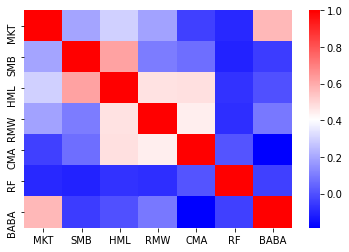

                            OLS Regression Results                            
Dep. Variable:                    IBM   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     135.5
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           1.43e-68
Time:                        12:53:20   Log-Likelihood:                 731.38
No. Observations:                 252   AIC:                            -1451.
Df Residuals:                     246   BIC:                            -1430.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0007      0.001     -0.826      0.4

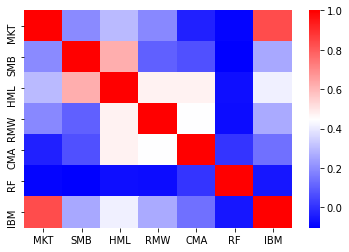

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     420.8
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          2.47e-118
Time:                        12:53:21   Log-Likelihood:                 831.30
No. Observations:                 252   AIC:                            -1651.
Df Residuals:                     246   BIC:                            -1629.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0004      0.001     -0.778      0.4

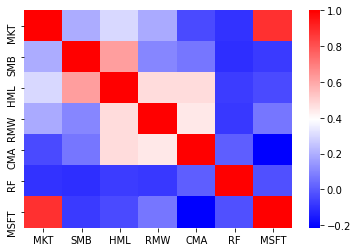

                            OLS Regression Results                            
Dep. Variable:                  GOOGL   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     223.5
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           2.58e-89
Time:                        12:53:21   Log-Likelihood:                 796.01
No. Observations:                 252   AIC:                            -1580.
Df Residuals:                     246   BIC:                            -1559.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0004      0.001     -0.589      0.5

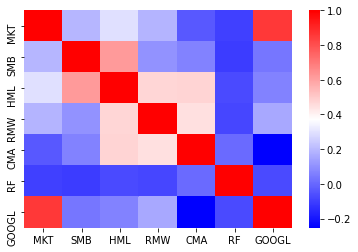

                            OLS Regression Results                            
Dep. Variable:                    GME   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     9.319
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           3.83e-08
Time:                        12:53:21   Log-Likelihood:                 337.88
No. Observations:                 252   AIC:                            -663.8
Df Residuals:                     246   BIC:                            -642.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0031      0.004      0.771      0.4

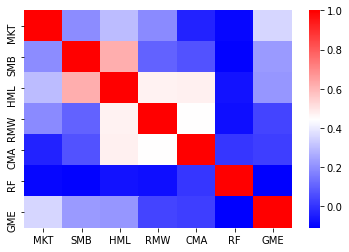

In [4]:
ff_factors = pd.read_csv('../../data/ff_factors.csv')
ff_factors.index = [dtm.datetime.strptime(str(x), "%Y-%m-%d") for x in ff_factors.iloc[:, 0]]
ff_factors = ff_factors.iloc[:, 1:]
ff_factors = ff_factors.rename(columns={'Mkt-RF': 'MKT'})
ff_factors = ff_factors.apply(lambda x: x / 100)
for idx, log_price in enumerate(log_prices):
    ff_price = pd.concat([ff_factors, log_price], axis=1)
    ff_model = smd.ols(formula=tickers[idx] + '~MKT+SMB+HML+RMW+CMA', data=ff_price).fit()
    print(ff_model.summary())
    sns.heatmap(ff_price.corr(), cmap='bwr')
    plt.show()
